In [387]:
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
from nltk.util import ngrams
import pandas as pd
import string
import numpy as np

# How to play the game Wordle

In [2]:
# using english words to generate words

In [494]:
from english_words import english_words_lower_alpha_set as els

words = []
with open('wordlelist.txt','r') as file:
    words.append(file.readlines())

In [495]:
five_letter_words = [word.strip('\n') for word in words[0]]

In [496]:
words = five_letter_words
len(words)

12947

In [497]:
vowels = 'a e i o u'.split(' ')
alphabet = [char for char in string.ascii_lowercase]

In [498]:
# Frequency of the Individual Letters

In [499]:
alpha_count = {}
list_of_letters =[]
for word in words:
    for i in word:
        list_of_letters.append(i)

for letter in alphabet:
    alpha_count[letter] = list_of_letters.count(letter)
alphalist = list(alpha_count.items())
alphaframe = pd.DataFrame(alpha_count.items(), columns = ['Letter','Frequency'])
alphaframe = alphaframe.sort_values('Frequency',ascending=False)

Text(0, 0.5, 'Count')

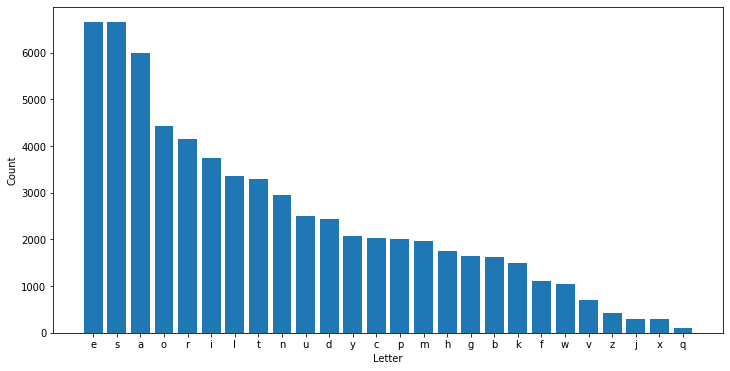

In [500]:
plt.figure(figsize= (12,6))
plt.bar(alphaframe['Letter'],alphaframe['Frequency'])
plt.xlabel("Letter")
plt.ylabel("Count")

In [501]:
vowelframe = alphaframe[alphaframe['Letter'].isin(vowels)]

Text(0, 0.5, 'Count')

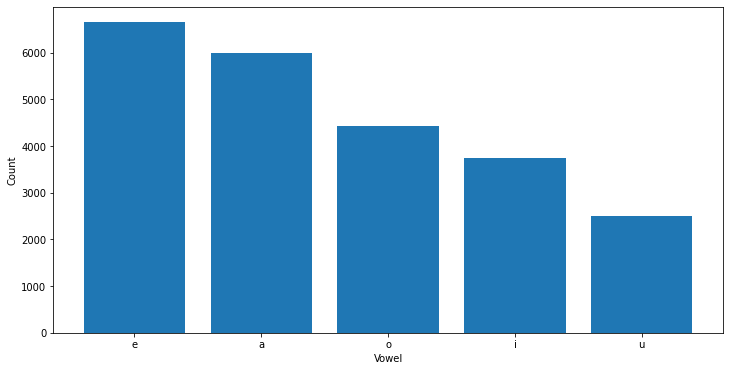

In [502]:
plt.figure(figsize= (12,6))
plt.bar(vowelframe['Letter'],vowelframe['Frequency'])
plt.xlabel("Vowel")
plt.ylabel("Count")

# Frequency based on Position

In [503]:
# isolating the consonants into a list 
constants = [letter for letter in alphabet if letter not in vowels]

In [504]:

wordsplit = []
for word in words:
    wordsplit.append(list(word.lower()))
    
wordframe = pd.DataFrame(wordsplit)

firstposition = dict(wordframe.pivot_table(columns=[0], aggfunc='size'))
secondposition= dict(wordframe.pivot_table(columns=[1], aggfunc='size'))
thirdposition = dict(wordframe.pivot_table(columns=[2], aggfunc='size'))
fourthposition= dict(wordframe.pivot_table(columns=[3], aggfunc='size'))
fifthposition = dict(wordframe.pivot_table(columns=[4], aggfunc='size'))
for key in firstposition.keys():
    firstposition[key] = firstposition[key]
for key in secondposition.keys():
    secondposition[key] = secondposition[key]
for key in thirdposition.keys():
    thirdposition[key] = thirdposition[key]
for key in fourthposition.keys():
    fourthposition[key] = fourthposition[key]
for key in fifthposition.keys():
    fifthposition[key] = fifthposition[key]


(0.0, 2000.0)

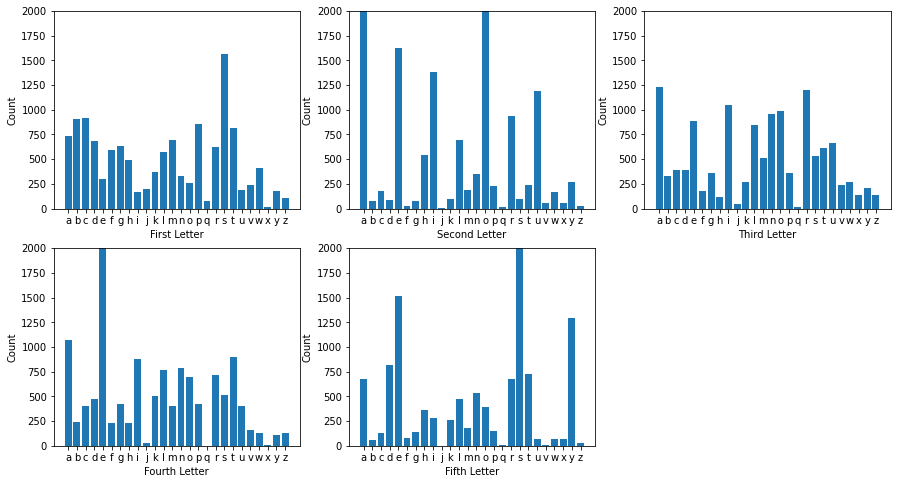

In [505]:
plt.figure(figsize= (15,8))
plt.subplot(231)
plt.bar(firstposition.keys(),firstposition.values())
plt.xlabel("First Letter")
plt.ylabel("Count")
plt.ylim(0,2000)

plt.subplot(232)
plt.bar(secondposition.keys(),secondposition.values())
plt.xlabel("Second Letter")
plt.ylabel("Count")
plt.ylim(0,2000)

plt.subplot(233)
plt.bar(thirdposition.keys(),thirdposition.values())
plt.xlabel("Third Letter")
plt.ylabel("Count")
plt.ylim(0,2000)

plt.subplot(234)
plt.bar(fourthposition.keys(),fourthposition.values())
plt.xlabel("Fourth Letter")
plt.ylabel("Count")
plt.ylim(0,2000)

plt.subplot(235)
plt.bar(fifthposition.keys(),fifthposition.values())
plt.xlabel("Fifth Letter")
plt.ylabel("Count")
plt.ylim(0,2000)


# Average vowel to consonant ratio

In [434]:
vow_const_list = {word:[word.count('a') + word.count('e') + word.count('i') + word.count('o') + word.count('u'),  len(word)-(word.count('a') + word.count('e') + word.count('i') + word.count('o') + word.count('u'))] for word in words}
#vow_const_list

In [435]:
const_vow_ratio = {k: vow_const_list[k][0]/ vow_const_list[k][1] for k,v in vow_const_list.items()}
avg_const_vow_ratio = sum(const_vow_ratio.values())/len(const_vow_ratio.values())
avg_const_vow_ratio # this means that on average the ratio between constant to vowels is about 3 to 2

0.6324953013568871

# Filtering Words

In [436]:
from random import choice
import regex as re
import seaborn as sns 
import matplotlib.pyplot as plt

In [437]:
def score(guess):
    slots = 'b b b b b'.split(' ')
    for i in range(5):
        if hiddenword[i] == guess[i]:
            slots[i] = 'g'
        elif guess[i] in hiddenword and slots[i] != 'g':
            slots[i] = 'y'
    return(slots)

In [438]:
def filter_words(guess, scre):
    p = []
    q = []
    for word in words:
        for i in range(5):
            if scre[i] == 'b' and guess[i] in word:
                p.append(word)
                break
            elif scre[i] == 'g' and guess[i] != word[i]:
                p.append(word)


            elif scre[i] == 'y' and guess[i] not in word and word in words:
                p.append(word)
                break

            elif scre[i] == 'y' and guess[i] == word[i] and word in words:
                p.append(word)
                break
    for i in p:
        if i not in q:
            q.append(i)
    c = list(set(words) - set(q))
    return(c)

In [444]:
i = 0 
guess_table = {1:0,2:0,3:0,4:0,5:0, 6:0, 7:0}
while i < 1000:
    words = five_letter_words
    number_of_guesses = 0
    hiddenword = choice(words)
    guess = choice(words)
    #print(list(guess))
    #print(score(guess))
    #print('\n')
    while score(guess) != ['g','g','g','g','g']:
        score(guess)
        words = filter_words(guess, score(guess))
        guess = choice(words)

        #print(list(guess))
        #print(score(guess))
        #print('\n')

        number_of_guesses += 1
    if number_of_guesses == 1:
        guess_table[1] += 1
    elif number_of_guesses == 2:
        guess_table[2] += 1
    elif number_of_guesses == 3:
        guess_table[3] += 1
    elif number_of_guesses == 4:
        guess_table[4] += 1
    elif number_of_guesses == 5:
        guess_table[5] += 1
    elif number_of_guesses == 6:
        guess_table[6] += 1
    elif number_of_guesses == 7:
        guess_table[7] += 1
        
    i += 1
    #print(i)


In [486]:
guess_table = {1: 5, 2: 84, 3: 262, 4: 278, 5: 198, 6: 91, 7: 45}
#{1: 5, 2: 84, 3: 262, 4: 278, 5: 198, 6: 91, 7: 45}

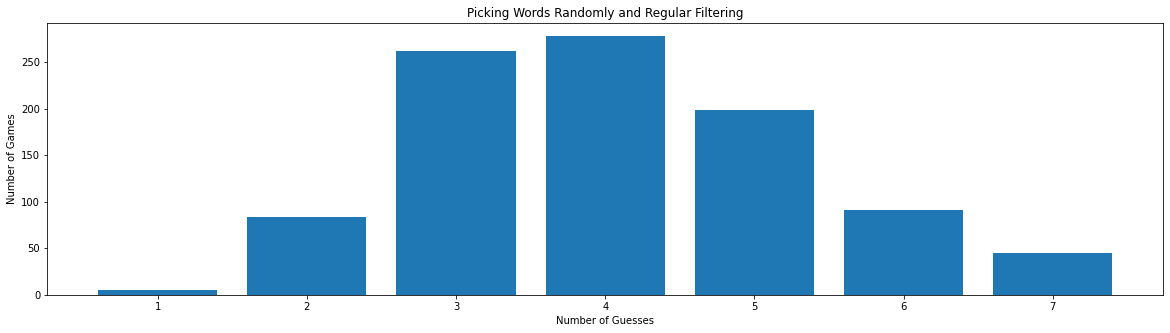

In [487]:
plt.figure(figsize = (20,5))
plt.xlabel("Number of Guesses")
plt.ylabel('Number of Games')
plt.title('Picking Words Randomly and Regular Filtering')
plt.bar(x = guess_table.keys(), height = guess_table.values()); # graph of 1000 plays of wordle 


In [488]:
key_array = np.array(list(guess_table.keys()))
freq_array = np.array(list(guess_table.values()))/sum(guess_table.values())
guess_avg = np.dot(key_array,freq_array)
guess_avg # on average it takes about 3 guess to get the correct word

4.0726895119418485

# Finding the best first guess and Filtering through probability

## Finding probability by randomly picking letters regarless of position 

Returning to the top of the project we look at frequencies again 

In [448]:
def dict_sort(dict1):
    sorted_values = sorted(dict1.values(), reverse = True) # Sort the values
    firstpositionsorted = {}

    for i in sorted_values:
        for k in dict1.keys():
            if dict1[k] == i:
                firstpositionsorted[k] = dict1[k]
                break

    return(firstpositionsorted)

In [449]:
sum_of_freq = sum(alpha_count.values())
for k,v in alpha_count.items():
    alpha_count[k] = v/sum_of_freq

In [450]:
def rank(words):
    alpha_count['.'] = 0
    word_rank = {}
    for word in words:
        word_rank[word] = alpha_count[word[0]]*alpha_count[word[1]]*alpha_count[word[2]]*alpha_count[word[3]]*alpha_count[word[4]]
    word_rank = dict_sort(word_rank)
    return(list(word_rank.keys()))

In [455]:
i = 0  # simulating 1000 games 
guess_table = {1:0,2:0,3:0,4:0,5:0, 6:0}
while i < 1000:
    words = five_letter_words
    number_of_guesses = 0
    hiddenword = choice(words)
    guess = 'reese'
    #print(list(guess))
    #print(score(guess))
    #print('\n')
    while score(guess) != ['g','g','g','g','g']:
        score(guess)
        words = filter_words(guess, score(guess))
        guess = rank(words)[0]

        #print(list(guess))
        #print(score(guess))
        #print('\n')

        number_of_guesses += 1
    if number_of_guesses == 1:
        guess_table[1] += 1
    elif number_of_guesses == 2:
        guess_table[2] += 1
    elif number_of_guesses == 3:
        guess_table[3] += 1
    elif number_of_guesses == 4:
        guess_table[4] += 1
    elif number_of_guesses == 5:
        guess_table[5] += 1
    elif number_of_guesses == 6:
        guess_table[6] += 1
        
    i += 1
    #print(i)


In [475]:
guess_table = 
#{1: 6, 2: 66, 3: 154, 4: 256, 5: 202, 6: 147}

{1: 6, 2: 66, 3: 154, 4: 256, 5: 202, 6: 147}

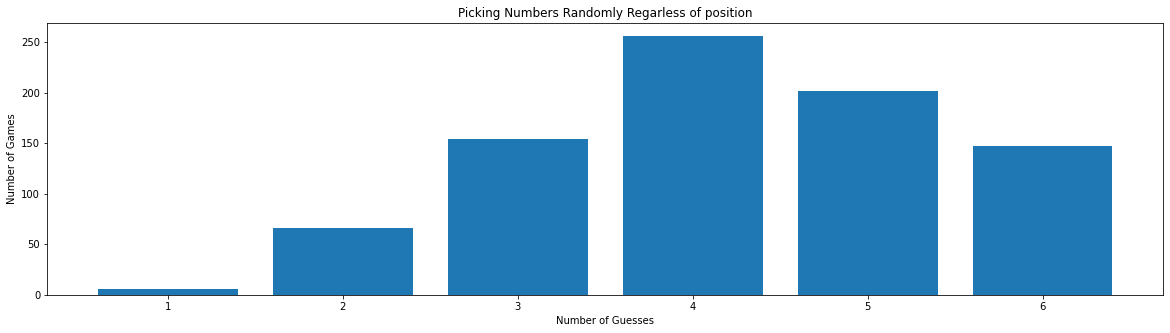

In [477]:
plt.figure(figsize = (20,5))
plt.xlabel("Number of Guesses")
plt.ylabel('Number of Games')
plt.title('Picking Numbers Randomly Regarless of position')
plt.bar(x = guess_table.keys(), height = guess_table.values()); # graph of 1000 plays of wordle 

In [480]:
key_array = np.array(list(guess_table.keys()))
freq_array = np.array(list(guess_table.values()))/sum(guess_table.values())
guess_avg = np.dot(key_array,freq_array)
guess_avg # on average it takes about 3 guess to get the correct word

4.231046931407942

## Picking Random Letters by Position Frequency 

In [459]:

def rank_pos(words):
    word_rank = {}
    for word in words:
        word_rank[word] = firstposition[word[0]]*secondposition[word[1]]*thirdposition[word[2]]*fourthposition[word[3]]*fifthposition[word[4]]
    word_rank = dict_sort(word_rank)
    return(list(word_rank.keys()))

In [507]:
i = 0  # simulating 1000 games 
guess_table = {1:0,2:0,3:0,4:0,5:0, 6:0}
while i < 1000:
    words = five_letter_words
    number_of_guesses = 0
    hiddenword = choice(words)
    guess = 'carey'
    #print(list(guess))
    #print(score(guess))
    #print('\n')
    while score(guess) != ['g','g','g','g','g']:
        score(guess)
        words = filter_words(guess, score(guess))
        guess = rank_pos(words)[0]

        #print(list(guess))
        #print(score(guess))
        #print('\n')

        number_of_guesses += 1
    if number_of_guesses == 1:
        guess_table[1] += 1
    elif number_of_guesses == 2:
        guess_table[2] += 1
    elif number_of_guesses == 3:
        guess_table[3] += 1
    elif number_of_guesses == 4:
        guess_table[4] += 1
    elif number_of_guesses == 5:
        guess_table[5] += 1
    elif number_of_guesses == 6:
        guess_table[6] += 1
        
    i += 1
    #print(i)

In [508]:
guess_table

{1: 11, 2: 118, 3: 258, 4: 280, 5: 160, 6: 90}

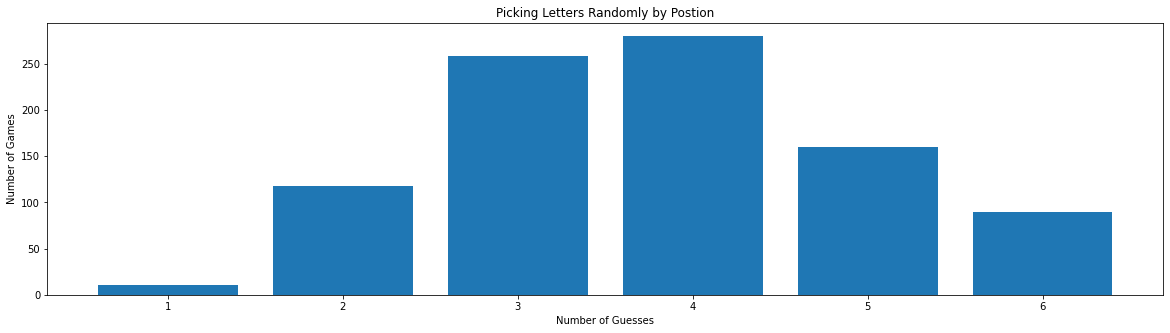

In [509]:
plt.figure(figsize = (20,5))
plt.xlabel("Number of Guesses")
plt.ylabel('Number of Games')
plt.title('Picking Letters Randomly by Postion')
plt.bar(x = guess_table.keys(), height = guess_table.values()); # graph of 1000 plays of wordle 

In [511]:
key_array = np.array(list(guess_table.keys()))
freq_array = np.array(list(guess_table.values()))/sum(guess_table.values())
guess_avg = np.dot(key_array,freq_array)
guess_avg # on average it takes about 3 guess to get the correct word

3.7960741548527803